# Credit Card Lead Prediction 

# Problem Statement: Identify the customers that would show higher interest towards a recommended credit card

In [1]:
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing credit card train and test dataset
credit_card_train = pd.read_csv('C:\\Users\\LENEVO\\Downloads\\train_s3TEQDk.csv',sep=',',encoding='latin')
credit_card_test = pd.read_csv('C:\\Users\\LENEVO\\Downloads\\test_mSzZ8RL.csv',sep=',',encoding='latin')

In [4]:
#Checking the shape of the dataset
print(credit_card_train.shape)
print(credit_card_test.shape)

(245725, 11)
(105312, 10)


In [9]:
#Checking the head of the train data
credit_card_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [11]:
#Observing the summarized information of the data
credit_card_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
#Checking statistical description of the data
credit_card_train.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,AK8GKYRG,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [7]:
#Checking unique values of each column
credit_card_train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

# Anatomy of the columns
1. ID: Qulitative(Rejected)
2. Gender : Categorical
3. Age: Quantitative
4. Region_Code : Qualitative(Rejected)
5. Occupation: Categorical
6. Channel_Code: Categorical
7. Vintage : Quantitaive
8. Credit_Product: Categorical
9. Avg_Account_Balance: Quantitaive
10. Is_Active: Categorical
11. Is_Lead: Categorical(Target Variable)

# Is_Lead is the Target Variable that will help us to determine the customers who would accept the recommended credit card 

# Determining the Machine Learning Model
Based on the above data description, it is clear that Supervised Machine Learning(Logistic Regression) would be used to find the solution as the target variable is categorical

# Looking at the distribution of the target variable

<AxesSubplot:xlabel='Is_Lead'>

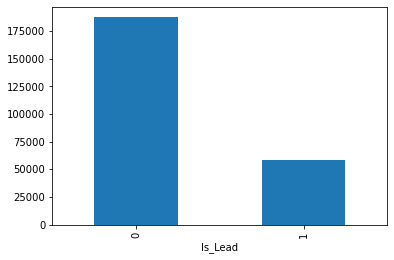

In [8]:
credit_card_train.groupby('Is_Lead').size().plot(kind='bar')

The values in the Target Variable are distributed significantly to proceed further.

# Dropping the useless columns from the dataset

In [12]:
#Assigning qualitative variables to a list variable
uselessColumns = ['ID','Region_Code']
credit_card_train.drop(uselessColumns,axis=1,inplace=True)

# Visual Exploratory Data Analysis
 * Categorical Variables: Bar Graph
 * Continous/Quantitaive Variables: Histogram

In [14]:
#Extracting all the columns from the dataset
credit_card_train.columns

Index(['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [15]:
#Making List of Categorical and Quantitaive Variables
categoricalVariables = ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']
continuousVariables = ['Age','Vintage','Avg_Account_Balance']

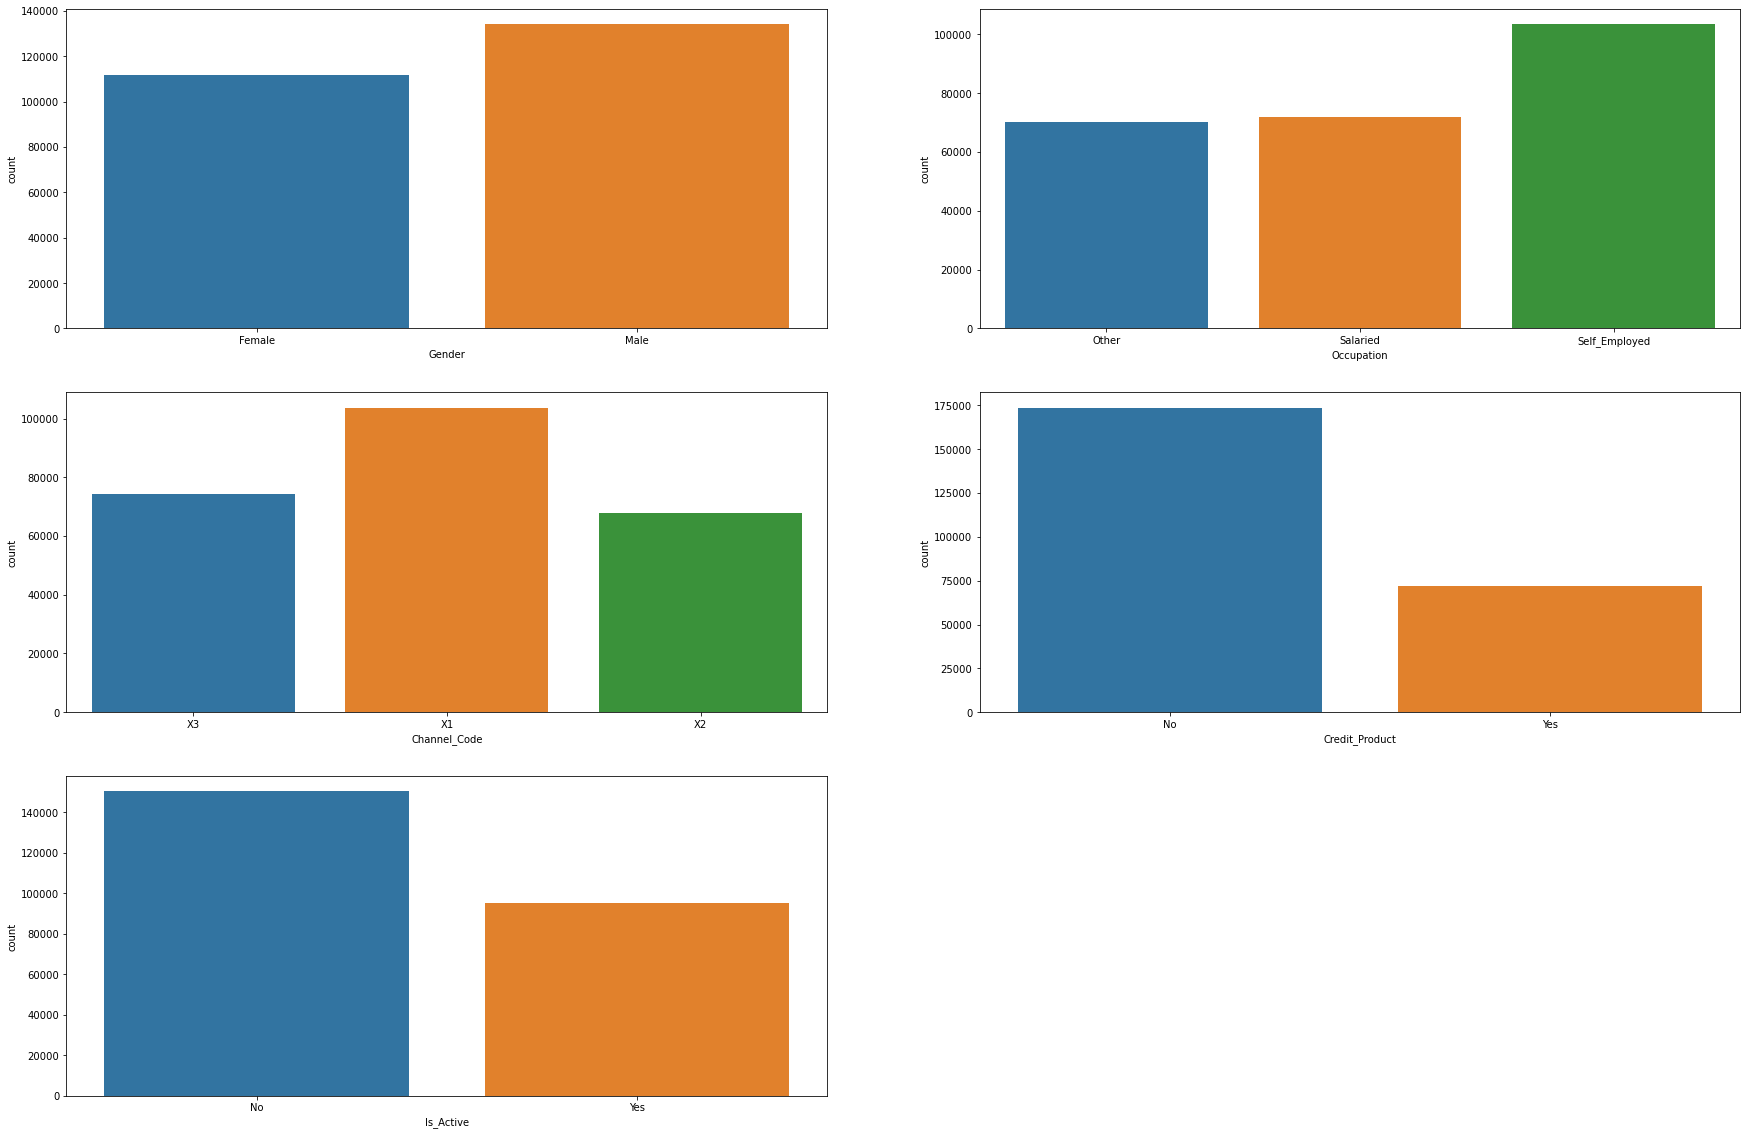

In [89]:
#Visualizing the distribution of categorical variables through Bar Grapgh
plt.figure(figsize=(30,20))
for i,feature in enumerate(categoricalVariables):
    plt.subplot(3,2,i+1)
    sns.countplot(credit_card_train[feature])

The value of Entrepreneur in Occupation column and X4 in Channel Code are very less as compared to the other values,
thus they would be considered as outliers and would be replaced by the other significant value

In [86]:
credit_card_train['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

In [88]:
credit_card_train['Occupation'].replace({'Entrepreneur':'Self_Employed'},inplace=True)
credit_card_train['Channel_Code'].replace({'X4':'X3'},inplace=True)

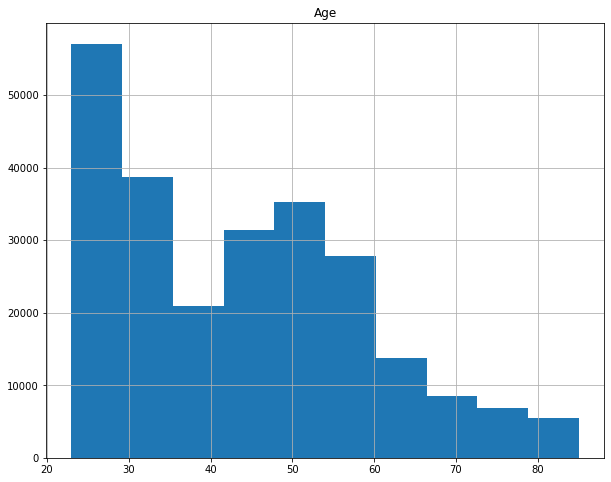

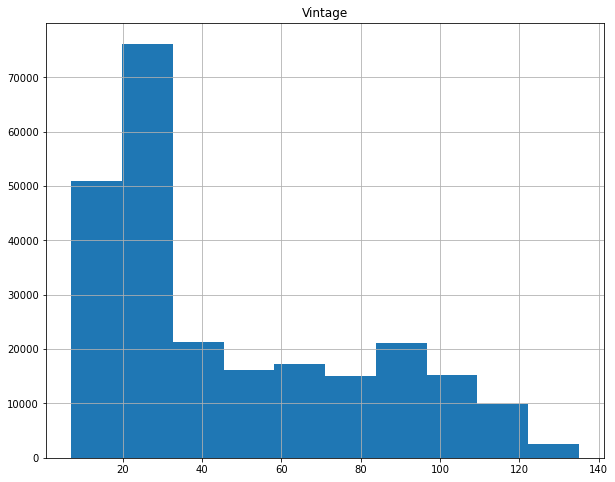

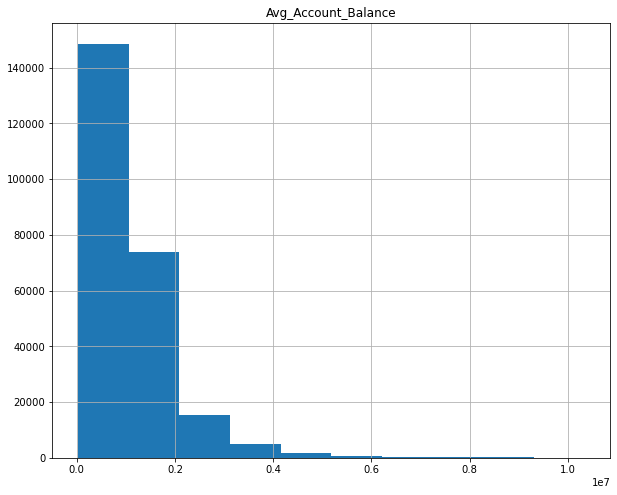

In [22]:
#Visualizing distribution of Quantitaive variables through histogram
for i in continuousVariables:
    credit_card_train.hist([i],figsize=(10,8))

There values of the quantitaive variables are significantly ditsributed for the analysis and there are no outliers present in the variables

# Missing Value Treatment

In [29]:
#EXtractiong missing/null values present in the dataset
credit_card_train.isna().sum()

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [28]:
#Replacing missing/null values of credit product column with the mode value because it is a categorical variable
credit_card_train['Credit_Product'].fillna(credit_card_train['Credit_Product'].mode()[0],inplace=True)

# Exploratory Analysis of the test data
Same steps would be followed as done for train dataset.

In [164]:
test_data = credit_card_test.copy()

uselessColumns = ['ID','Region_Code']
#Dropping of the useless columns from the test data
test_data.drop(uselessColumns,axis=1,inplace=True)
test_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,Other,X1,25,Yes,742366,No
1,Male,43,Other,X2,49,NaN,925537,No
2,Male,31,Salaried,X1,14,No,215949,No
3,Male,29,Other,X1,33,No,868070,No
4,Female,29,Other,X1,19,No,657087,No


# Univariate Exploratory Analysis of the test data

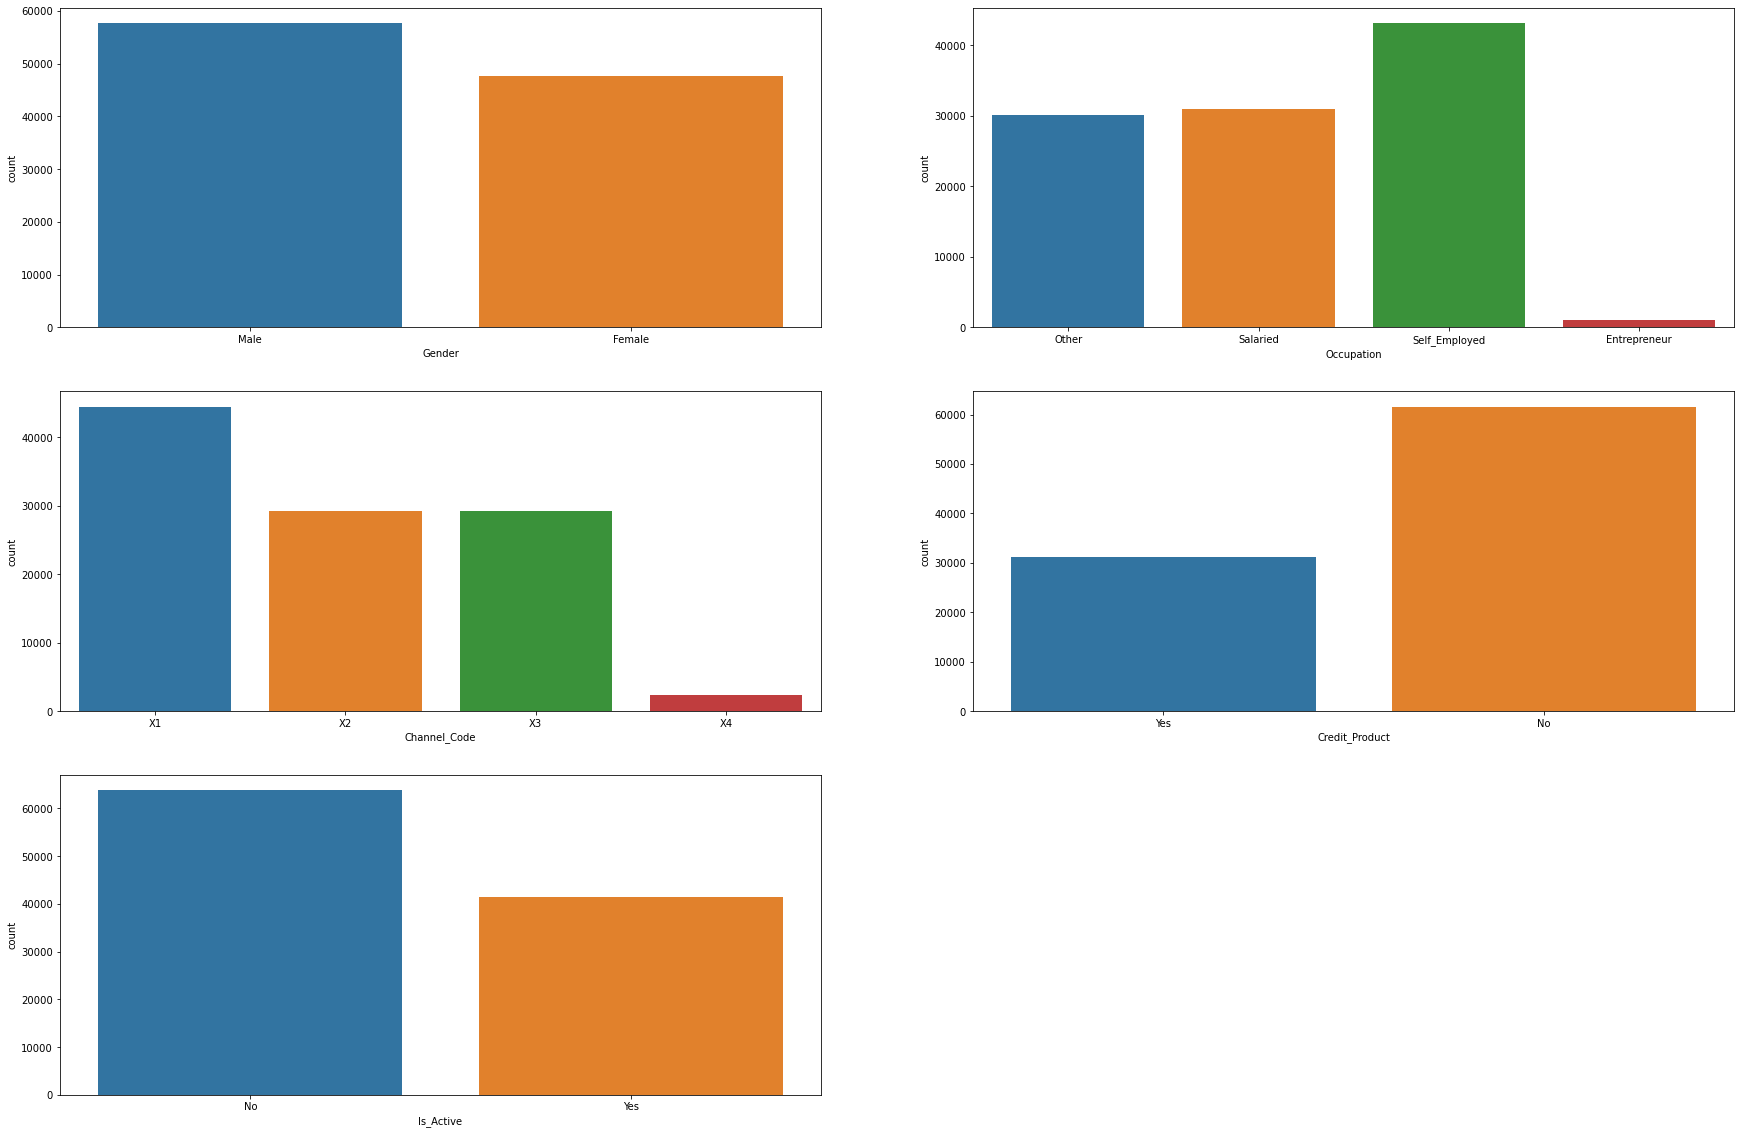

In [165]:
#Visualizing the distribution of categorical variables through Bar Grapgh
plt.figure(figsize=(30,20))
for i,feature in enumerate(categoricalVariables):
    plt.subplot(3,2,i+1)
    sns.countplot(test_data[feature])

In [166]:
#Removing outliers values of occupation and credit_product columns
test_data['Occupation'].replace({'Entrepreneur':'Self_Employed'},inplace=True)
test_data['Channel_Code'].replace({'X4':'X3'},inplace=True)

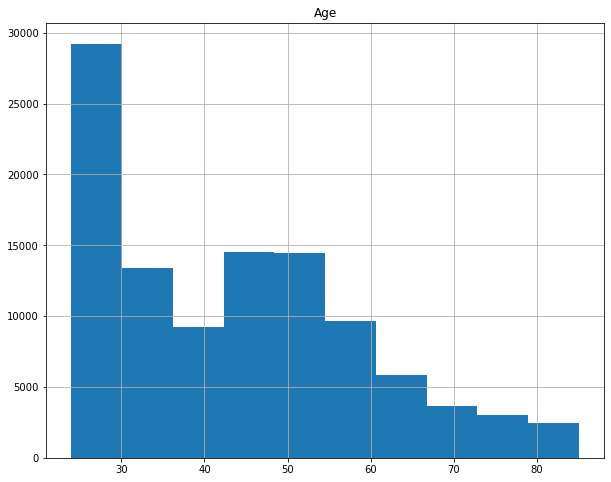

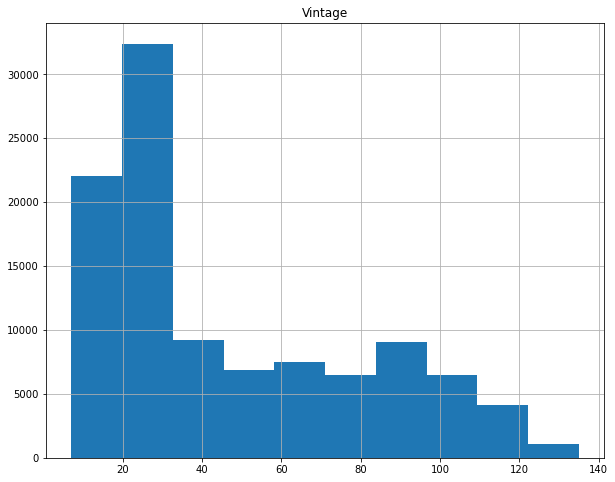

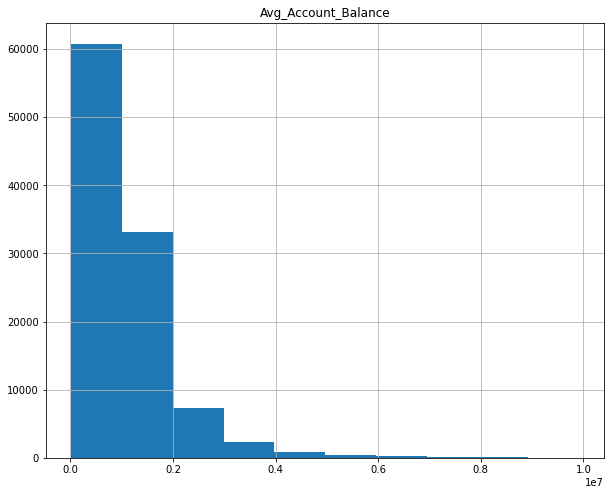

In [152]:
#Visualizing distribution of Quantitaive variables through histogram
for i in continuousVariables:
    test_data.hist([i],figsize=(10,8))

In [167]:
#Observing Missing values in the test data
test_data.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [168]:
#Missing values are less than 30% of the data, so values would be treated
#Treatment of missing values of credit_product column
test_data['Credit_Product'].fillna(test_data['Credit_Product'].mode()[0],inplace=True)

In [169]:
#Converting Gender into 1/0 mapping
test_data['Gender'].replace({'Male':0,'Female':1},inplace=True)

#Converting Credit_Product into 1/0 mapping
test_data['Credit_Product'].replace({'Yes':1,'No':0},inplace=True)

#Converting Is_Active into 1/0 mapping
test_data['Is_Active'].replace({'Yes':1,'No':0},inplace=True)


test_data.head()


,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,29,Other,X1,25,1,742366,0
1,0,43,Other,X2,49,0,925537,0
2,0,31,Salaried,X1,14,0,215949,0
3,0,29,Other,X1,33,0,868070,0
4,1,29,Other,X1,19,0,657087,0


In [173]:
#Generating dummy values of the multiclass categorical columns in test dataset
test_data=pd.get_dummies(test_data)
test_data.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3
0,0,29,25,1,742366,0,1,0,0,1,0,0
1,0,43,49,0,925537,0,1,0,0,0,1,0
2,0,31,14,0,215949,0,0,1,0,1,0,0
3,0,29,33,0,868070,0,1,0,0,1,0,0
4,1,29,19,0,657087,0,1,0,0,1,0,0


# Statistical Analysis of the Train Dataset

 # Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.


## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship Exploration : Categorical VS Continuous --> Box Plot

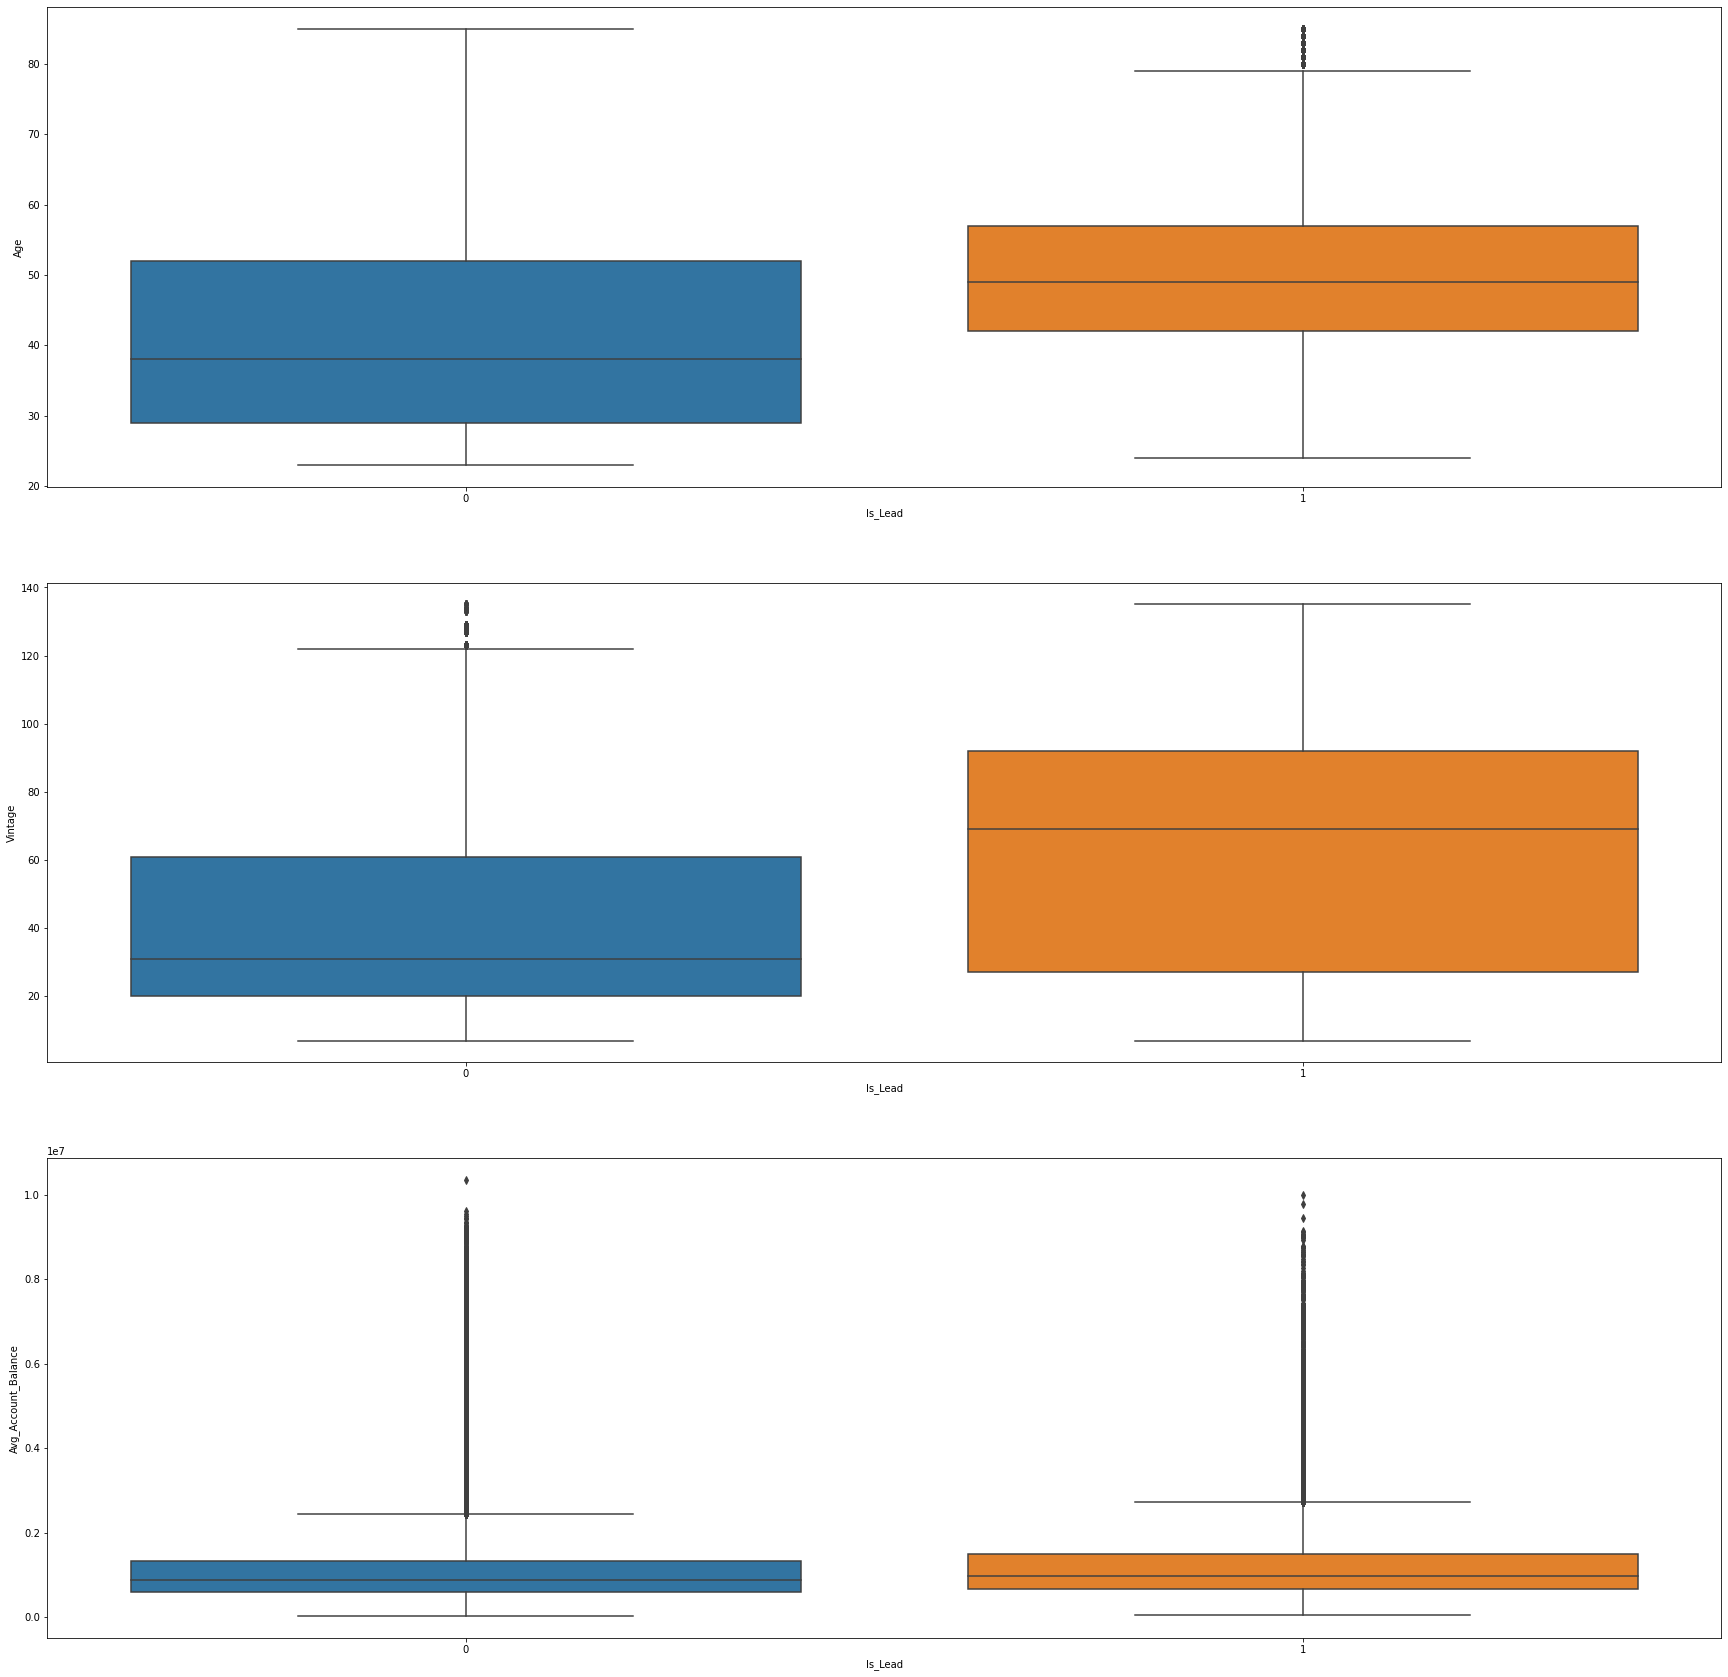

In [35]:
#Visualizing the relationship bwtween the categorical vs continuous predictors through box plot
plt.figure(figsize=(30,30))
for i,feature in enumerate(continuousVariables):
    plt.subplot(3,1,i+1)
    sns.boxplot(x='Is_Lead',y=feature,data=credit_card_train)

# Box-Plots interpretation

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

Through the above box plots it is clear that the Age,Vintage,Avg_Account_Balance are corelated with the target variable,
rest we will confirm from the ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [40]:
def Anova_test(targetVariable,PredictorVariable,inpData):
    from scipy.stats import f_oneway
    
    #Creating an empty list 
    selectedVariables =[]
    
    print('## ANOVA RESULT ##')
    for predictors in continuousVariables:
        GroupedList = inpData.groupby(targetVariable)[predictors].apply(list)
        Anova_Result = f_oneway(*GroupedList)
        
        #If p-Value is less than 0.05, we will reject the H0
        if(Anova_Result[1]<0.05):
            print(predictors,'is corelated with the',targetVariable,'| P-Value:',Anova_Result[1])
            selectedVariables.append(predictors)
        else:
            print(predictors,'is not corelated with the',targetVariable,'| P-Value:',Anova_Result[1])
    return(selectedVariables)  

In [41]:
Anova_test(targetVariable='Is_Lead',PredictorVariable=continuousVariables,inpData=credit_card_train)

## ANOVA RESULT ##
Age is corelated with the Is_Lead | P-Value: 0.0
Vintage is corelated with the Is_Lead | P-Value: 0.0
Avg_Account_Balance is corelated with the Is_Lead | P-Value: 1.8899852442341574e-154


['Age', 'Vintage', 'Avg_Account_Balance']

From the ANOVA Test we get our list of continuous predictors that are corelated with the target variable

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

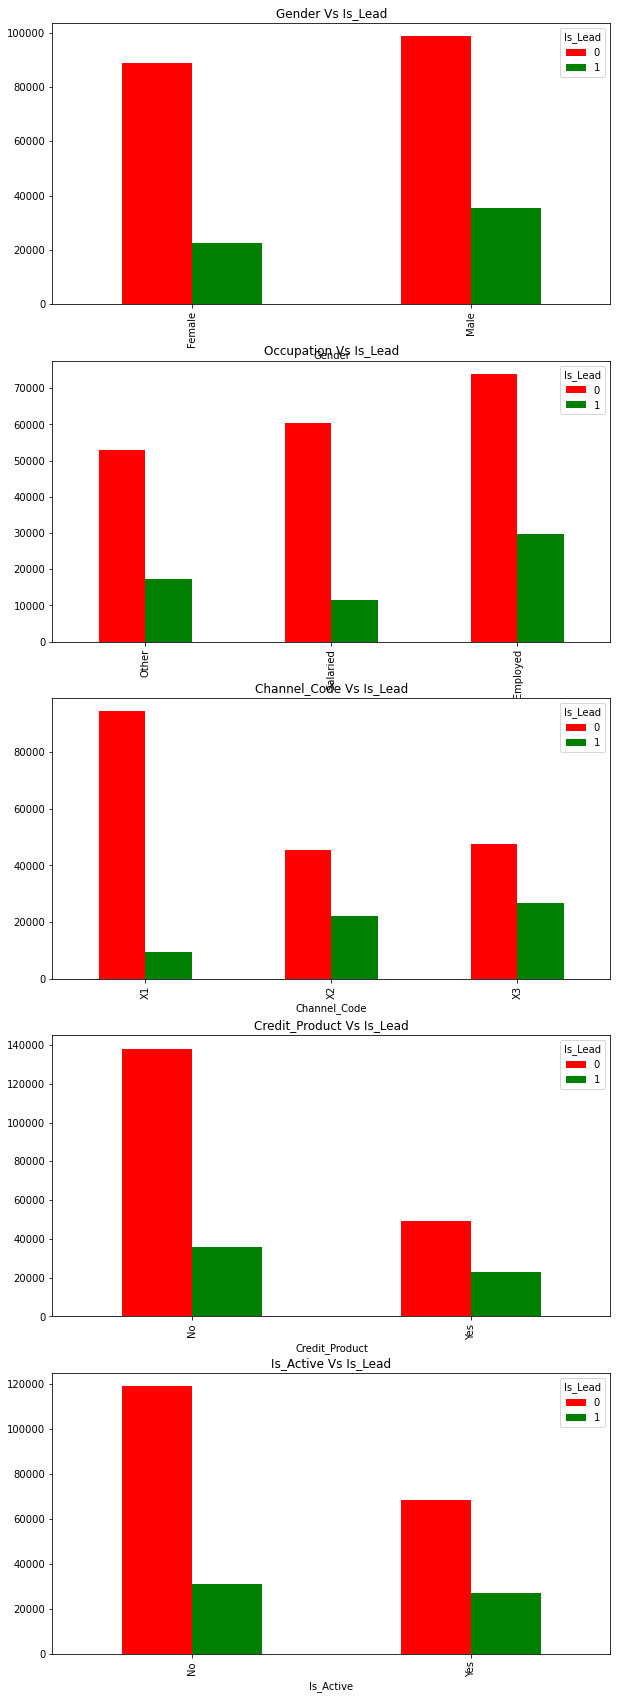

In [90]:
#Visualizing the relationship between the categorical vs categorical predictors using Grouped Var Charts
fig,plotCanvas = plt.subplots(nrows=len(categoricalVariables),ncols=1, figsize=(10,30))

for categoricalcols,i in zip(categoricalVariables,range(len(categoricalVariables))):
    CrossTabResult=pd.crosstab(index=credit_card_train[categoricalcols], columns=credit_card_train['Is_Lead'])
    CrossTabResult.plot.bar(color=['red','green'], ax=plotCanvas[i], title=categoricalcols+' Vs '+'Is_Lead')

# Grouped Bar charts Interpretation

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
If the ratio of bars is similar across all categories, then the two columns are not correlated. 

From the above grouped bar charts categorical predictors are corelated with the target variable.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [91]:
def chisqTest(targetVariable,predictorvariables,inpData):
    from scipy.stats import chi2_contingency
    
    #Creating empty list
    selectedPredictors=[]
    
    print('## Chisq Test ##')
    for predictors in predictorvariables:
        crossTab = pd.crosstab(index=inpData[targetVariable],columns=inpData[predictors])
        crossTabResult = chi2_contingency(crossTab)
        
        #if P-Value is less than 0.05 we will reject the H0
        if(crossTabResult[1]<0.05):
            print(predictors,'is corelated with the',targetVariable,'| P-Value:',crossTabResult[1])
            selectedPredictors.append(predictors)
        else:
            print(predictors,'is not corelated with the',targetVariable,'| P-Value:',crossTabResult[1])
            

In [92]:
chisqTest(targetVariable='Is_Lead',predictorvariables=categoricalVariables,inpData=credit_card_train)

## Chisq Test ##
Gender is corelated with the Is_Lead | P-Value: 1.949380935011988e-279
Occupation is corelated with the Is_Lead | P-Value: 0.0
Channel_Code is corelated with the Is_Lead | P-Value: 0.0
Credit_Product is corelated with the Is_Lead | P-Value: 0.0
Is_Active is corelated with the Is_Lead | P-Value: 0.0


From the above statistical test we get our final set of predictor variables
Age,Vintage,Avg_Account_Balance,Gemder,Occupation,Channel_Code,Credit_Product,Is_Active

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning


In [93]:
selectedColumns = ['Age','Vintage','Avg_Account_Balance','Gender','Occupation','Channel_Code','Credit_Product','Is_Active']

DataForML = credit_card_train[selectedColumns]
DataForML.head()

,Age,Vintage,Avg_Account_Balance,Gender,Occupation,Channel_Code,Credit_Product,Is_Active
0,73,43,1045696,Female,Other,X3,No,No
1,30,32,581988,Female,Salaried,X1,No,No
2,56,26,1484315,Female,Self_Employed,X3,No,Yes
3,34,19,470454,Male,Salaried,X1,No,No
4,30,33,886787,Female,Salaried,X1,No,No


In [94]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this dataset there are no ordinal categorical columns 

## Converting the binary nominal variable to numeric using 1/0 mapping

In [95]:
#Converting Gender into 1/0 mapping
DataForML['Gender'].replace({'Male':0,'Female':1},inplace=True)

#Converting Credit_Product into 1/0 mapping
DataForML['Credit_Product'].replace({'Yes':1,'No':0},inplace=True)

#Converting Is_Active into 1/0 mapping
DataForML['Is_Active'].replace({'Yes':1,'No':0},inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [96]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the ML Data
DataForML_Numeric['Is_Lead']=credit_card_train['Is_Lead']

#Checking head of the ML data
DataForML_Numeric.head()

,Age,Vintage,Avg_Account_Balance,Gender,Credit_Product,Is_Active,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Is_Lead
0,73,43,1045696,1,0,0,1,0,0,0,0,1,0
1,30,32,581988,1,0,0,0,1,0,1,0,0,0
2,56,26,1484315,1,0,1,0,0,1,0,0,1,0
3,34,19,470454,0,0,0,0,1,0,1,0,0,0
4,30,33,886787,1,0,0,0,1,0,1,0,0,0


In [99]:
DataForML_Numeric.shape

(245725, 13)

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [97]:
#Printing all the columns of ML Data for reference
DataForML_Numeric.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Gender', 'Credit_Product',
       'Is_Active', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Channel_Code_X1', 'Channel_Code_X2',
       'Channel_Code_X3', 'Is_Lead'],
      dtype='object')

In [100]:
#Separate target variable and predictor variables

TargetVariable = 'Is_Lead'
Predictors = ['Age', 'Vintage', 'Avg_Account_Balance', 'Gender', 'Credit_Product',
       'Is_Active', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X1',
       'Channel_Code_X2', 'Channel_Code_X3']

x= DataForML_Numeric[Predictors].values
y= DataForML_Numeric[TargetVariable].values

#Splitting the data into 70% Train and 30% Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =5)

In [70]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values of X
X=PredictorScalerFit.transform(x)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [101]:
#Cheking the shape of the splitted data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(172007, 12)
(172007,)
(73718, 12)
(73718,)


# LOGISTIC REGRESSION MODEL

LogisticRegression accuracy is 0.771
LogisticRegression log_loss is 0.488
LogisticRegression auc is 0.726
LogisticRegression roc-auc is 0.726
Best Threshold=0.279453, G-Mean=0.664


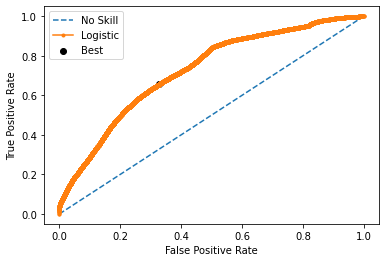


Accuracy values for 10-fold Cross Validation:
 [0.7033524  0.70221717 0.70302503 0.70367001 0.70536551 0.70102272
 0.70227782 0.70326144 0.70162827 0.70209305]

Final Average Accuracy of the model: 0.7
         ID  Is_Lead
0  VBENBARO        0
1  CCMEWNKY        0
2  VK3KGA9M        0
3  TT8RPZVC        0
4  SHQZEYTZ        0
              ID  Is_Lead
105307  DBENJOYI        1
105308  CWQ72DWS        0
105309  HDESC8GU        0
105310  2PW4SFCA        0
105311  F2NOYPPZ        0


In [189]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2',solver='newton-cg',random_state=0)

#creating the model on training data
LOG = clf.fit(x_train,y_train)
y_pred = LOG.predict(x_test)
y_pred_proba = LOG.predict_proba(x_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


print(LOG.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(LOG.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(LOG.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(LOG.__class__.__name__+" roc-auc is %2.3f" % roc_auc_score(y_test, y_pred_proba))


#calculating gmean for each threshold
gmeans = np.sqrt(tpr *(1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thr[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



# DECISION TREE MODEL

DecisionTreeClassifier(criterion='entropy', max_depth=6)
DecisionTreeClassifier accuracy is 0.784
DecisionTreeClassifier log_loss is 0.455
DecisionTreeClassifier auc is 0.770
DecisionTreeClassifier roc-auc is 0.770
Best Threshold=0.241921, G-Mean=0.705


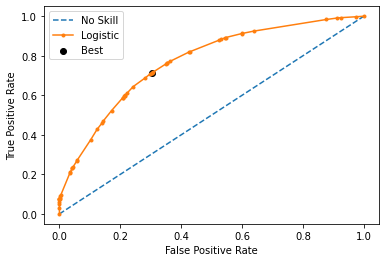


Accuracy values for 10-fold Cross Validation:
 [0.7033524  0.70221717 0.70302503 0.70367001 0.70536551 0.70102272
 0.70227782 0.70326144 0.70162827 0.70209305]

Final Average Accuracy of the model: 0.7
         ID  Is_Lead
0  VBENBARO        0
1  CCMEWNKY        0
2  VK3KGA9M        0
3  TT8RPZVC        0
4  SHQZEYTZ        0
              ID  Is_Lead
105307  DBENJOYI        1
105308  CWQ72DWS        1
105309  HDESC8GU        0
105310  2PW4SFCA        0
105311  F2NOYPPZ        0


In [187]:
#Decision Trees
from sklearn import tree
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(x_train,y_train)
y_pred = DTree.predict(x_test)
y_pred_proba = DTree.predict_proba(x_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


print(DTree.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(DTree.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(DTree.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(DTree.__class__.__name__+" roc-auc is %2.3f" % roc_auc_score(y_test, y_pred_proba))


#calculating gmean for each threshold
gmeans = np.sqrt(tpr *(1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thr[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


test_data['Is_Lead']=DTree.predict(test_data[Predictors])
test_data['ID']=credit_card_test['ID']

submission = test_data[['ID','Is_Lead']]

print(submission.head())
print(submission.tail())

submission.to_csv('C:\\Users\\LENEVO\\Documents\\1\\Analytics Vidhya\\submission.csv',index=False)

# Plotting Decision Tree

In [183]:
# Installing the required library for plotting the decision tree
!pip install dtreeplt

In [ ]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)

# The accuracy and the roc_auc_score of the decision tree model is higher than the logistic regression model, so decision tree model would be considered as the final model and the predictions on the test dataset would be evaluated on desicion tree model basis 